In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
from pinn import PINNTrainer
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

## Set up

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "T0" : 1,
    "T_cold" : 1,
}

tf = 1
n_int = 128*tf
n_sb = 64*tf
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, 0, tf, **kwargs)

In [4]:
pinn.n_time_periods

tensor(1)

In [5]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

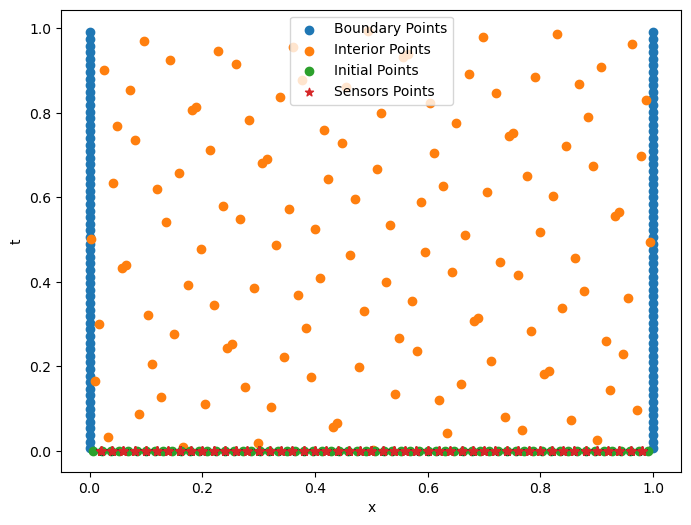

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(input_sb_[:, 1].detach().numpy(),
            input_sb_[:, 0].detach().numpy(),
            label="Boundary Points")
plt.scatter(input_int_[:, 1].detach().numpy(),
            input_int_[:, 0].detach().numpy(),
            label="Interior Points")
plt.scatter(input_tb_[:, 1].detach().numpy(),
            input_tb_[:, 0].detach().numpy(),
            label="Initial Points")
plt.scatter(input_meas_[:, 1].detach().numpy(),
            input_meas_[:, 0].detach().numpy()*0,
            label="Sensors Points", marker="*")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

## Training

In [7]:
hist = pinn.fit(num_epochs=1, verbose=True)

################################  0  ################################
Total loss:  2.1186 | PDE Loss:  1.1184 | Function Loss:  -1.3833
Total loss:  2.1149 | PDE Loss:  1.1147 | Function Loss:  -1.1769
Total loss:  2.0987 | PDE Loss:  1.0978 | Function Loss:  -0.5946
Total loss:  1.9571 | PDE Loss:  0.9067 | Function Loss:  0.9966
Total loss:  1.8419 | PDE Loss:  0.6386 | Function Loss:  1.4146
Total loss:  1.7249 | PDE Loss:  0.5762 | Function Loss:  1.1873
Total loss:  1.662 | PDE Loss:  0.6304 | Function Loss:  0.5089
Total loss:  1.5941 | PDE Loss:  0.5867 | Function Loss:  -0.1768
Total loss:  1.6639 | PDE Loss:  0.5429 | Function Loss:  1.05
Total loss:  1.569 | PDE Loss:  0.5618 | Function Loss:  -0.2162
Total loss:  1.55 | PDE Loss:  0.5472 | Function Loss:  -0.6332
Total loss:  1.5393 | PDE Loss:  0.5359 | Function Loss:  -0.5695
Total loss:  1.4963 | PDE Loss:  0.4721 | Function Loss:  0.2309
Total loss:  1.4751 | PDE Loss:  0.4562 | Function Loss:  0.105
Total loss:  1.464 |

## Visualization

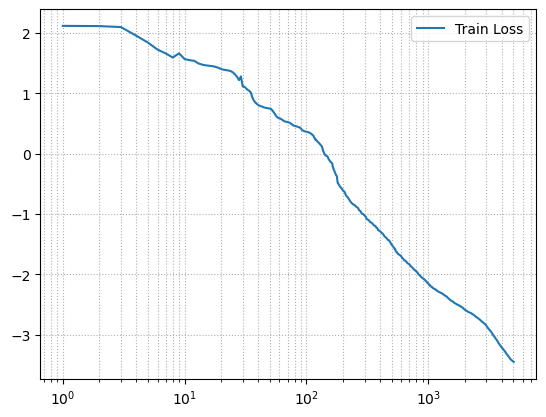

In [8]:
plt.figure(dpi=100)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

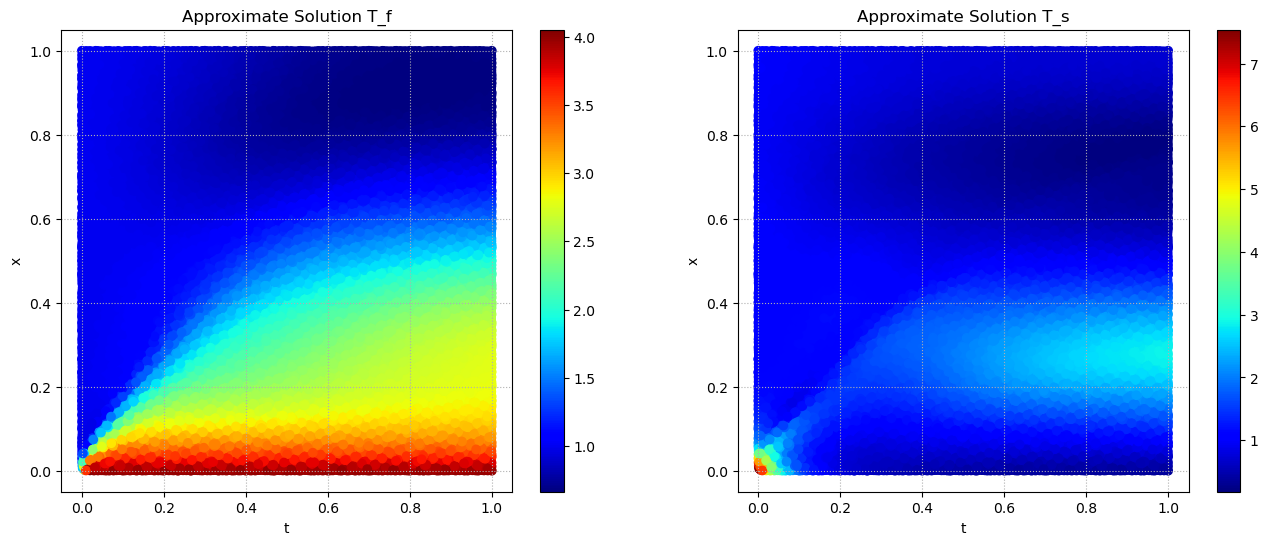

In [9]:
pinn.plot()

Text(0.5, 1.0, 'Measured Tf')

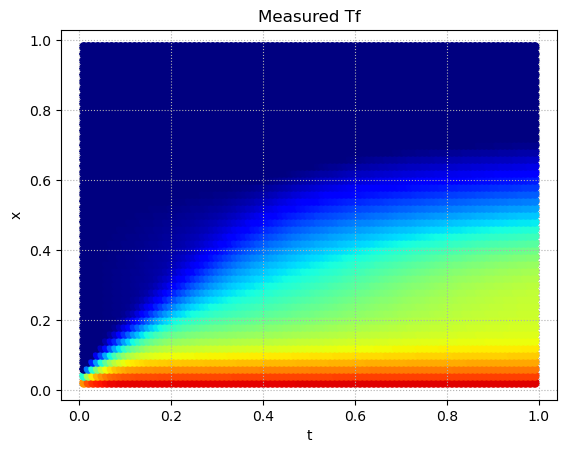

In [10]:
plt.scatter(
    input_meas_[:, 0],
    input_meas_[:, 1],
    c=output_meas_,
    cmap="jet",
    clim=(1, 4)
)
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True, which="both", ls=":")
plt.title(f"Measured Tf")

In [11]:
64//3

21